#   MEMORIAL UNIVERSITY
##  REINFORCEMENT LEARNING
### ASSIGNMENT PROJECT THREE

GROUP MEMBERS:
-   ADEJOKE ADEOYE
-   CEPHAS ACQUAH FORSON

#   PART ONE

In [1]:
#----------Imports------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


####    Plot the Grid

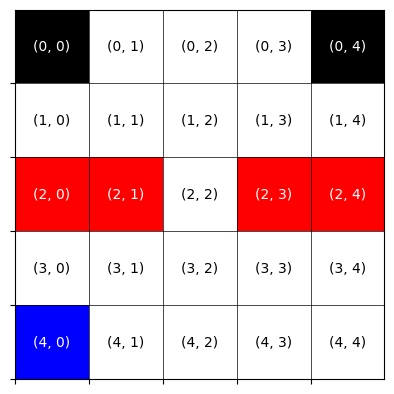

In [2]:
# grid size
grid_size = 5

# Initialize  grid 
grid = np.ones((grid_size, grid_size, 3))

# Set colors 
black = [0, 0, 0]
blue = [0, 0, 1]
red = [1, 0, 0]
white = [1, 1, 1]

grid[0, 0] = black
grid[0, 4] = black
grid[4, 0] = blue
grid[2, 0] = red
grid[2, 1] = red
grid[2, 3] = red
grid[2, 4] = red

# Create plot
fig, ax = plt.subplots()
ax.imshow(grid, extent=[0, grid_size, 0, grid_size])

# Label  cells 
for i in range(grid_size):
    for j in range(grid_size):
        cell_label = f"({i}, {j})"
        ax.text(j + 0.5, grid_size - i - 0.5, cell_label, ha='center', va='center', color='black' if np.array_equal(grid[i, j], white) else 'white')

# Set  ticks and labels
ax.set_xticks(np.arange(0.5, grid_size, 1))
ax.set_yticks(np.arange(0.5, grid_size, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Draw grid lines
ax.grid(which='both', color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(which='minor', color='grey', linestyle='-', linewidth=1)

# Display plot
plt.show()

### Set up the grid world environment

In [3]:
# Function for Grid
class GridWorld:
    def __init__(self):
        self.grid_size = 5
        self.start_state = (4, 0)
        self.terminal_states = [(0, 0), (0, 4)]
        self.red_states = [(2, 0), (2, 1), (2, 3), (2, 4)]
        self.actions = ['up', 'down', 'left', 'right']
        self.action_dict = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        r, c = self.state
        dr, dc = self.action_dict[action]
        r, c = r + dr, c + dc

        if r < 0 or r >= self.grid_size or c < 0 or c >= self.grid_size:
            r, c = self.state

        next_state = (r, c)
        reward = -1

        if next_state in self.red_states:
            reward = -20
            next_state = self.start_state
        elif next_state in self.terminal_states:
            reward = 0

        self.state = next_state
        return next_state, reward

    def is_terminal(self):
        return self.state in self.terminal_states


### Policies

In [4]:
#   Epsilon Greedy function
def epsilon_greedy_policy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(env.actions)
    else:
        return env.actions[np.argmax(Q[state])]

#   Sarsa Function
def sarsa(env, episodes, alpha, gamma, epsilon):
    Q = {(r, c): np.zeros(len(env.actions)) for r in range(env.grid_size) for c in range(env.grid_size)}
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        while not env.is_terminal():
            next_state, reward = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)
            Q[state][env.actions.index(action)] += alpha * (reward + gamma * Q[next_state][env.actions.index(next_action)] - Q[state][env.actions.index(action)])
            state, action = next_state, next_action
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards
    
#   Qlearning Function
def q_learning(env, episodes, alpha, gamma, epsilon):
    Q = {(r, c): np.zeros(len(env.actions)) for r in range(env.grid_size) for c in range(env.grid_size)}
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0

        while not env.is_terminal():
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward = env.step(action)
            Q[state][env.actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][env.actions.index(action)])
            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards


### Plot functions

In [5]:
# Plot the rewards
def plot_rewards(sarsa_rewards, q_learning_rewards):
    plt.plot(sarsa_rewards, label='Sarsa')
    plt.plot(q_learning_rewards, label='Q-learning')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.show()

#trajectories    
def simulate_trajectory(Q, env):
    state = env.reset()
    trajectory = [state]
    while not env.is_terminal():
        action = env.actions[np.argmax(Q[state])]
        state, _ = env.step(action)
        trajectory.append(state)
    return trajectory

def plot_trajectory(trajectory, title):
    fig, ax = plt.subplots()
    ax.imshow(grid, extent=[0, grid_size, 0, grid_size])

    for (i, j) in trajectory:
        ax.text(j + 0.5, grid_size - i - 0.5, 'X', ha='center', va='center', color='black')

    ax.set_xticks(np.arange(0.5, grid_size, 1))
    ax.set_yticks(np.arange(0.5, grid_size, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.grid(which='both', color='black', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(0, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(0, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

    ax.set_title(title)
    plt.show()


Run the functions

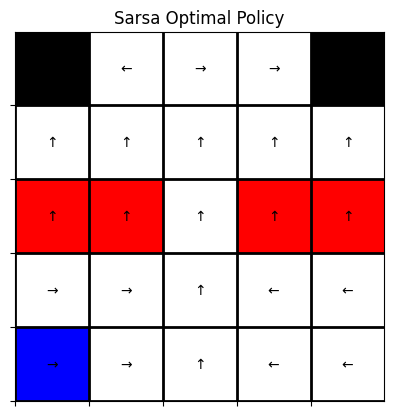

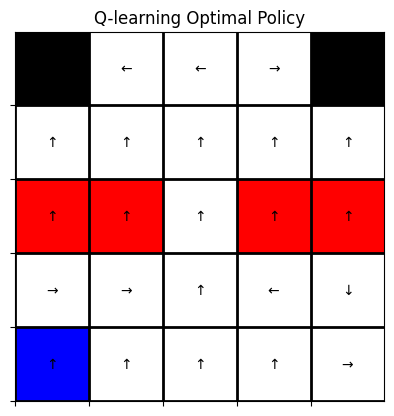

In [6]:
# Initial environment
env = GridWorld()

# parameters
episodes = 100000
alpha = 0.05
gamma = 0.99
epsilon = 0.05

# Run Sarsa and Q-learning
sarsa_Q, sarsa_rewards = sarsa(env, episodes, alpha, gamma, epsilon)
q_learning_Q, q_learning_rewards = q_learning(env, episodes, alpha, gamma, epsilon)

# Simulate trajectories
sarsa_trajectory = simulate_trajectory(sarsa_Q, env)
q_learning_trajectory = simulate_trajectory(q_learning_Q, env)

def extract_policy(Q, env):
    policy = {}
    for state in Q:
        policy[state] = env.actions[np.argmax(Q[state])]
    return policy

def plot_policy(policy, title):
    fig, ax = plt.subplots()
    ax.imshow(grid, extent=[0, grid_size, 0, grid_size])

    for (state, action) in policy.items():
        r, c = state
        action_arrow = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
        ax.text(c + 0.5, grid_size - r - 0.5, action_arrow[action], ha='center', va='center', color='black')

    ax.set_xticks(np.arange(0.5, grid_size, 1))
    ax.set_yticks(np.arange(0.5, grid_size, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.grid(which='both', color='black', linestyle='-', linewidth=2)
    ax.set_xticks(np.arange(0, grid_size, 1))
    ax.set_yticks(np.arange(0, grid_size, 1))
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

    ax.set_title(title)
    plt.show()

# plots
sarsa_policy = extract_policy(sarsa_Q, env)
q_learning_policy = extract_policy(q_learning_Q, env)

plot_policy(sarsa_policy, 'Sarsa Optimal Policy')
plot_policy(q_learning_policy, 'Q-learning Optimal Policy')

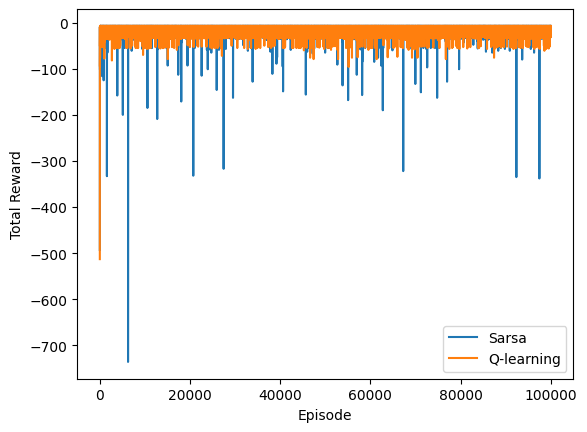

In [7]:
# Rewards
plot_rewards(sarsa_rewards, q_learning_rewards)


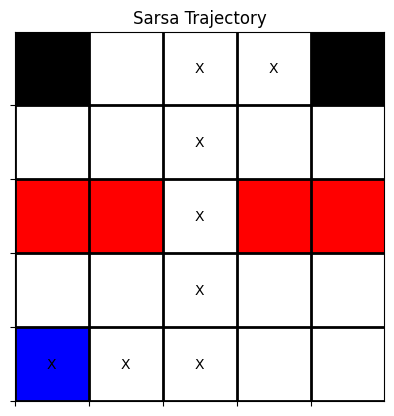

In [8]:
# Plot sarsa_trajectory
plot_trajectory(sarsa_trajectory, 'Sarsa Trajectory')


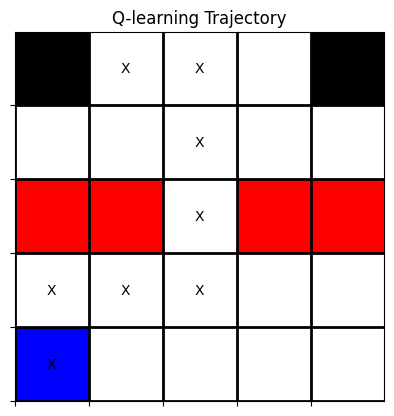

In [9]:
# Plot q_learning_trajectory
plot_trajectory(q_learning_trajectory, 'Q-learning Trajectory')


#   PART 2

Set up environment

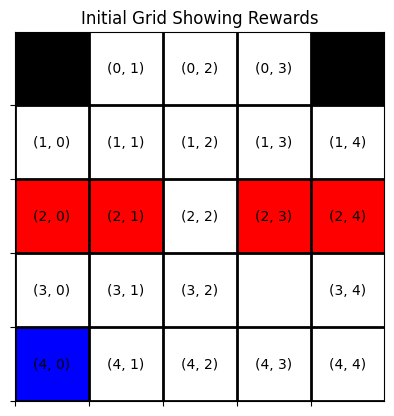

In [10]:
# initial grid 
fig, ax = plt.subplots()
ax.imshow(grid, extent=[0, grid_size, 0, grid_size])

# Label cells 
for i in range(grid_size):
    for j in range(grid_size):
        if (i, j) == (0, 6):
            cell_label = f"({i}, {j})\nRew: 1"
            color = 'white'
        elif (i, j) == (6, 0):
            cell_label = f"({i}, {j})\nRew: -1"
            color = 'white'
        elif (i, j) == (3, 3):
            cell_label = f"({i}, {j})"
            color = 'white'
        else:
            cell_label = f"({i}, {j})"
            color = 'black'
        ax.text(j + 0.5, grid_size - i - 0.5, cell_label, ha='center', va='center', color=color)

# Set ticks and labels
ax.set_xticks(np.arange(0.5, grid_size, 1))
ax.set_yticks(np.arange(0.5, grid_size, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Draw grid lines
ax.grid(which='both', color='black', linestyle='-', linewidth=2)
ax.set_xticks(np.arange(0, grid_size, 1))
ax.set_yticks(np.arange(0, grid_size, 1))
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Display plot
plt.title("Initial Grid Showing Rewards")
plt.show()


In [11]:
# grid size
grid_size = 7

#  colors
white = [1, 1, 1]
blue = [0, 0, 1]
black = [0, 0, 0]

# grid with white cells
grid = np.ones((grid_size, grid_size, 3))

# colors for terminal states
grid[0, 6] = black  # Terminal state with reward 1
grid[6, 0] = black  # Terminal state with reward -1
grid[3, 3] = blue  # Start state

# Terminal states and rewards
terminal_states = {(6, 0): -1, (0, 6): 1}

# start state
start_state = (3, 3)

# actions and their effects
actions = ['up', 'down', 'left', 'right']
action_effects = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}

# get the next state and reward
def get_next_state_reward(state, action):
    if state in terminal_states:
        return state, 0
    
    r, c = state
    dr, dc = action_effects[action]
    next_state = (r + dr, c + dc)
    
    # Check for boundaries
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state
        reward = 0
    else:
        reward = terminal_states.get(next_state, 0)
    
    return next_state, reward

# generate an episode
def generate_episode():
    episode = []
    state = start_state
    while state not in terminal_states:
        action = np.random.choice(actions)
        next_state, reward = get_next_state_reward(state, action)
        episode.append((state, reward))
        state = next_state
    episode.append((state, terminal_states[state]))
    return episode


In [12]:
# Gradient Monte Carlo method
def gradient_monte_carlo(alpha, episodes, gamma=1.0):
    weights = np.zeros((grid_size, grid_size))
    for _ in range(episodes):
        episode = generate_episode()
        G = 0
        for state, reward in reversed(episode):
            G = gamma * G + reward
            if state not in terminal_states:
                state_vector = np.zeros((grid_size, grid_size))
                state_vector[state] = 1
                value_estimate = np.sum(weights * state_vector)
                weights += alpha * (G - value_estimate) * state_vector
    return weights

# Semi-gradient TD(0) method
def semi_gradient_td_0(alpha, episodes, gamma=1.0):
    weights = np.zeros((grid_size, grid_size))
    for _ in range(episodes):
        state = start_state
        while state not in terminal_states:
            action = np.random.choice(actions)
            next_state, reward = get_next_state_reward(state, action)
            state_vector = np.zeros((grid_size, grid_size))
            state_vector[state] = 1
            next_state_vector = np.zeros((grid_size, grid_size))
            next_state_vector[next_state] = 1
            value_estimate = np.sum(weights * state_vector)
            next_value_estimate = np.sum(weights * next_state_vector)
            td_error = reward + gamma * next_value_estimate - value_estimate
            weights += alpha * td_error * state_vector
            state = next_state
    return weights


In [13]:
# Parameters
alpha = 0.01
episodes = 10000
gamma = 1.0

# value functions
value_function_mc = gradient_monte_carlo(alpha, episodes, gamma)
value_function_td0 = semi_gradient_td_0(alpha, episodes, gamma)

# Convert value functions to DataFrames
df_mc = pd.DataFrame(value_function_mc, index=[f'Row {i}' for i in range(grid_size)], columns=[f'Col {j}' for j in range(grid_size)])
df_td0 = pd.DataFrame(value_function_td0, index=[f'Row {i}' for i in range(grid_size)], columns=[f'Col {j}' for j in range(grid_size)])

# Display DataFrames
print("Gradient Monte Carlo Value Function:")
print(df_mc)

print("\nSemi-Gradient TD(0) Value Function:")
print(df_td0)


Gradient Monte Carlo Value Function:
          Col 0     Col 1     Col 2     Col 3     Col 4     Col 5     Col 6
Row 0 -0.258642 -0.097377  0.142706  0.302015  0.476807  1.155913  0.000000
Row 1  0.160974 -0.009524  0.001591  0.212677  0.456642  0.996117  1.443245
Row 2  0.165738 -0.102849 -0.031106  0.143604  0.572936  0.941994  1.310346
Row 3 -0.265724 -0.119662  0.048007  0.074532  0.331691  0.774370  1.137026
Row 4 -0.793953 -0.534106 -0.311281  0.078154  0.268020  0.757629  0.928487
Row 5 -1.514312 -1.021776 -0.421764  0.233644  0.371870  0.698656  1.013842
Row 6  0.000000 -1.166981 -0.596385  0.036868  0.252348  0.751580  0.724253

Semi-Gradient TD(0) Value Function:
          Col 0     Col 1     Col 2     Col 3     Col 4     Col 5     Col 6
Row 0 -0.000813  0.039187  0.117987  0.209154  0.354776  0.609064  0.000000
Row 1 -0.035995  0.001584  0.065937  0.170505  0.279451  0.449232  0.592879
Row 2 -0.113326 -0.069705 -0.000684  0.082047  0.176420  0.292598  0.361800
Row 3 -0.22634

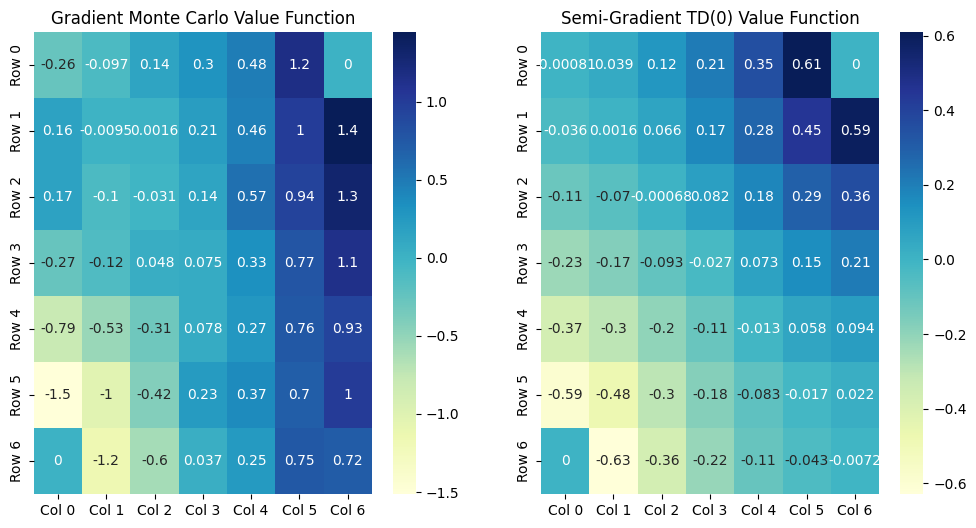

In [14]:
# Visualize value functions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df_mc, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Gradient Monte Carlo Value Function")

sns.heatmap(df_td0, annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Semi-Gradient TD(0) Value Function")

plt.show()


In [15]:
# Exact value function
def exact_value_function(grid_size, gamma=1.0, theta=1e-6):
    value_function = np.zeros((grid_size, grid_size))
    delta = float('inf')
    
    while delta > theta:
        delta = 0
        new_value_function = np.copy(value_function)
        
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                if state in terminal_states:
                    continue
                
                v = 0
                for action in actions:
                    next_state, reward = get_next_state_reward(state, action)
                    v += 0.25 * (reward + gamma * value_function[next_state])
                
                new_value_function[state] = v
                delta = max(delta, abs(new_value_function[state] - value_function[state]))
        
        value_function = new_value_function
    
    return value_function

exact_values = exact_value_function(grid_size)

# Convert  to DataFrame 
df_exact = pd.DataFrame(exact_values, index=[f'Row {i}' for i in range(grid_size)], columns=[f'Col {j}' for j in range(grid_size)])

print("Exact Value Function:")
print(df_exact)


Exact Value Function:
          Col 0     Col 1     Col 2         Col 3         Col 4         Col 5  \
Row 0  0.000000  0.035707  0.107122  2.167510e-01  3.746201e-01  6.093910e-01   
Row 1 -0.035707  0.000000  0.068909  1.685142e-01  2.977214e-01  4.535554e-01   
Row 2 -0.107122 -0.068909  0.000000  9.067797e-02  1.941991e-01  2.977214e-01   
Row 3 -0.216751 -0.168514 -0.090678  3.469447e-18  9.067797e-02  1.685142e-01   
Row 4 -0.374620 -0.297721 -0.194199 -9.067797e-02  1.040834e-17  6.890865e-02   
Row 5 -0.609391 -0.453555 -0.297721 -1.685142e-01 -6.890865e-02  1.734723e-17   
Row 6  0.000000 -0.609391 -0.374620 -2.167510e-01 -1.071216e-01 -3.570696e-02   

              Col 6  
Row 0  0.000000e+00  
Row 1  6.093910e-01  
Row 2  3.746201e-01  
Row 3  2.167510e-01  
Row 4  1.071216e-01  
Row 5  3.570696e-02  
Row 6  2.080506e-17  


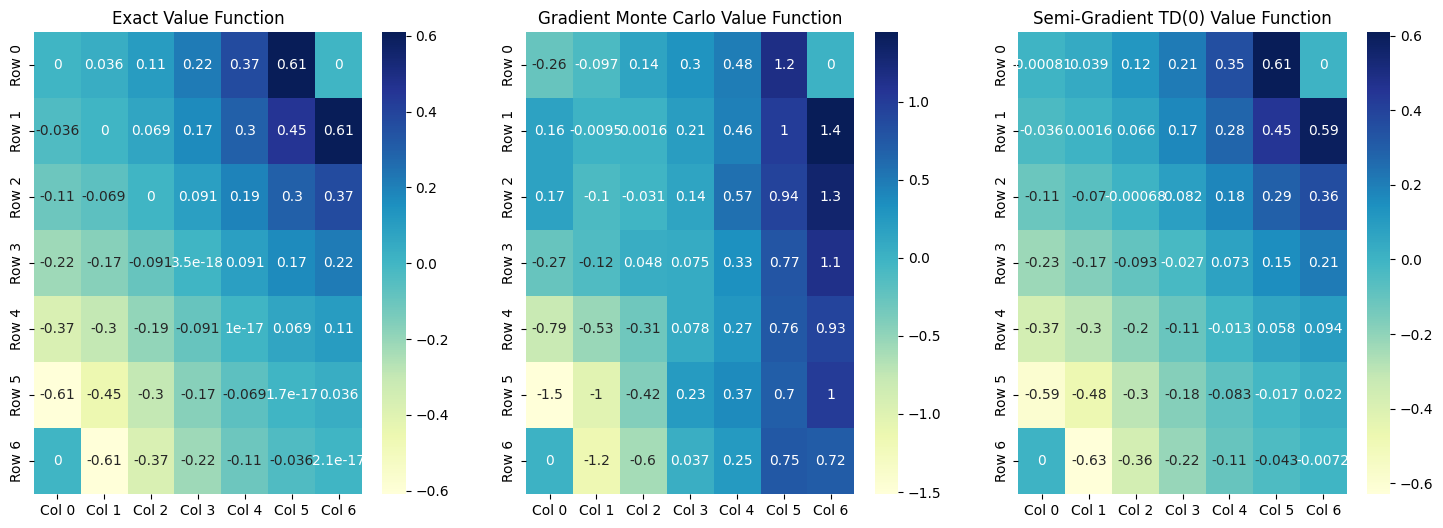

In [16]:
# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(df_exact, annot=True, cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Exact Value Function")

sns.heatmap(df_mc, annot=True, cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Gradient Monte Carlo Value Function")

sns.heatmap(df_td0, annot=True, cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Semi-Gradient TD(0) Value Function")

plt.show()
